In [7]:
import numpy as np
import matplotlib.pyplot as plt

def fn_lieb_prod(lieb1, lieb2):
    # lieb1.fn_print()
    # lieb2.fn_print()
    lieb = TL(lieb1.M)   
    lieb.map = TL.fn_map_product(lieb1.map, lieb2.map)
    lieb.cn = lieb.map[0]
    
    return lieb


def fn_map_contract(map):
    m = (len(map) - 1)//2
    circle_number = map[0]
    v_finished = [0 for _ in range(2*m)]
    for k in range(1,2*m+1):
        if v_finished[k-1]==0:
            p = k
            # print(p)
            v_finished[p-1] = 1
            while True:
                p = map[p]
                # print(p)
                v_finished[p-1] = 1
                p = (p+m-1)%(2*m) +1
                # print(p)
                if p==k:
                    circle_number = circle_number + 1
                    break
                v_finished[p-1] = 1
                
    return circle_number


def fn_map_product(map1, map2):
    m = (len(map1) - 1)//2
    new_map = [map1[0]+map2[0]] + map1[1:m+1] + map2[m+1:]
        
    fn_up = lambda x: map1[x+m] - m
    fn_down = lambda x: map2[x]
    v_finished = [0 for _ in range(m)]
    for k in range(1,m+1):      
        if v_finished[k-1]==0:     
            p = k
            v_finished[p-1] = 1
            while True:
                p = fn_down(p)
                if p>=m+1:
                    point1 = p
                    break
                v_finished[p-1] = 1
                    
                p = fn_up(p)
                if p<=0:
                    point1 = p + m
                    break
                if p==k:
                    new_map[0] = new_map[0] + 1
                    break
                v_finished[p-1] = 1
                                  
            if p!=k:
                p = k
                while True:
                    p = fn_up(p)
                    if p<=0:
                        point2 = p + m
                        break
                    v_finished[p-1] = 1
                        
                    p = fn_down(p)
                    if p>=m+1:
                        point2 = p
                        break
                    v_finished[p-1] = 1
                        
                new_map[point2] = point1
                new_map[point1] = point2
                
    return new_map  


def fn_virsual(map,y):
    m = (len(map) - 1)//2     
    for k in range(1,m+1):
        plt.plot((k,k),(y-1.5,y+0.5),'y--')     
    v_finished = [0 for _ in range(2*m)]
    for k in range(1,2*m+1):
        if v_finished[k-1]==0:
            ind1 = k
            ind2 = map[k]
            if ind1<=m:
                p1_x = ind1
                p1_y = y
            else:
                p1_x = ind1 - m
                p1_y = y-1                
            if ind2<=m:
                p2_x = ind2
                p2_y = y
            else:
                p2_x = ind2 - m
                p2_y = y-1           
            v_finished[ind1-1] = 1
            v_finished[ind2-1] = 1
        if p1_y==(y-1) and p2_y==(y-1):
            TL.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True) 
        elif p1_y==y and p2_y==y:
            TL.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,False)
        else:
            TL.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True)     
    # plt.show()
    

# ====================================================================================    
    
    
class TL:   
    # Initialization of the Temperley-Lieb Algebra
    def __init__(self,N):
        self.map = [0] + [N+1+i for i in range(N)] + [i+1 for i in range(N)]
        self.cn = 0
        self.M = N
        self.pipe_dis = [[] for _ in range(N)]
        self.dis1 = []
        self.dis2 = []
        self.line = [[[-(i+1),0],[-(i+1+N),1]] for i in range(N)]
        self.stack_leg = [[], 0]     
        self.leg = []
        self.pipe = [[] for _ in range(N)]
        
        
    def fn_stack_leg_pull(self):
        if not self.stack_leg[0]:
            num_leg = self.stack_leg[1]
            self.stack_leg[1] = num_leg + 1
            self.leg.append([])
        else:
            num_leg = self.stack_leg[0][-1]
            self.stack_leg[0].pop()
        return num_leg

    def fn_stack_leg_push(self, index):
        self.stack_leg[0].append(index)
        
    def fn_print(self):
        print(self.map[1:self.M+1])
        print(self.map[self.M+1:2*self.M+1])
        print('circle number = %d' %self.cn)
        
        
    def fn_find_nearest(self,line,y):
        for k in range(len(self.line[line])-1):
            if self.line[line][k][1]<=y<self.line[line][k+1][1]:
                break
        if self.line[line][k][1] == y:
            return None
        up_ind = self.line[line][k][0]
        down_ind = self.line[line][k+1][0]
        return up_ind, down_ind, k
    
    
    def fn_insert_leg(self,pipe,y):
        line1 = pipe
        line2 = (pipe+1)%self.M
        res = self.fn_find_nearest(line1,y)
        if not res:
            return -1
        (left_up,left_down,index1) = res
        res = self.fn_find_nearest(line2,y)
        if not res:
            return -1
        (right_up,right_down,index2) = res
        
        new_leg = self.fn_stack_leg_pull()
        
        print('=======================================')
        print(new_leg)
        print(len(self.leg))
        print(self.leg) 
        self.leg[new_leg] = [pipe,y,[left_up,0],[left_down,0],[right_up,0],[right_down,0]]
        print(new_leg)
        print(len(self.leg))
        print(self.leg)
        print('=======================================')
        
        if left_up>=0:
            if self.leg[left_up][0]==pipe:
                self.leg[new_leg][2][1] = 5
                self.leg[left_up][3][0] = new_leg
                self.leg[left_up][3][1] = 4
            else:
                self.leg[new_leg][2][1] = 3
                self.leg[left_up][5][0] = new_leg
                self.leg[left_up][5][1] = 4
        
        if right_up>=0:
            if self.leg[right_up][0]==pipe:
                self.leg[new_leg][4][1] = 3
                self.leg[right_up][5][0] = new_leg
                self.leg[right_up][5][1] = 2
            else:
                self.leg[new_leg][4][1] = 5
                self.leg[right_up][3][0] = new_leg
                self.leg[right_up][3][1] = 2
                
        if left_down>=0:
            if self.leg[left_down][0]==pipe:
                self.leg[new_leg][3][1] = 4
                self.leg[left_down][2][0] = new_leg
                self.leg[left_down][2][1] = 5
            else:
                self.leg[new_leg][3][1] = 2
                self.leg[left_down][4][0] = new_leg
                self.leg[left_down][4][1] = 5
                
        if right_down>=0:
            if self.leg[right_down][0]==pipe:
                self.leg[new_leg][5][1] = 2
                self.leg[right_down][4][0] = new_leg
                self.leg[right_down][4][1] = 3
            else:
                self.leg[new_leg][5][1] = 4
                self.leg[right_down][2][0] = new_leg
                self.leg[right_down][2][1] = 3
        
        # print(index1)
        # print(index2)
        self.line[line1][index1+1:index1+1] = [[new_leg,y]]
        self.line[line2][index2+1:index2+1] = [[new_leg,y]]
        
        # the left_up direction:
        direction = 2
        ind = new_leg
        count = 0
        while True:
            ind_pre = ind
            ind = self.leg[ind_pre][direction][0]
            direction = self.leg[ind_pre][direction][1]
            count = count + 1
            if ind<0 or ind == new_leg:
                break      
        if ind==new_leg:
            if count%2==1:
                self.map[0] = self.map[0] - 1
            else:
                self.map[0] = self.map[0] + 1              
        else:
            p1 = -ind
            # the right_down direction:
            direction = 5
            ind = new_leg
            count = 0
            while True:
                ind_pre = ind
                ind = self.leg[ind_pre][direction][0]
                direction = self.leg[ind_pre][direction][1]
                count = count + 1
                if ind<0 or ind == new_leg:
                    break   
            if ind==new_leg:
                if count%2==1:
                    self.map[0] = self.map[0] - 1
                else:
                    self.map[0] = self.map[0] + 1
            else:
                p4 = -ind
                # the left_down direction:
                direction = 3
                ind = new_leg
                count = 0
                while True:
                    ind_pre = ind
                    ind = self.leg[ind_pre][direction][0]
                    direction = self.leg[ind_pre][direction][1]
                    count = count + 1
                    if ind<0 or ind == new_leg:
                        break  
                p2 = -ind
                # the right_up direction:
                direction = 4
                ind = new_leg
                count = 0
                while True:
                    ind_pre = ind
                    ind = self.leg[ind_pre][direction][0]
                    direction = self.leg[ind_pre][direction][1]
                    count = count + 1
                    if ind<0 or ind == new_leg:
                        break  
                p3 = -ind
                
                self.map[p1] = p3
                self.map[p3] = p1
                self.map[p2] = p4
                self.map[p4] = p2
                
        self.pipe[pipe].append(new_leg)        
        return new_leg        
    
    def fn_delete_leg(self,leg_new):
        pipe = self.leg[leg_new][0]
        y = self.leg[leg_new][1]
        line1 = pipe
        line2 = (pipe+1)%self.M
        # (left_up,left_down,index1) = self.fn_find_nearest(line1,y)
        # (right_up,right_down,index2) = self.fn_find_nearest(line2,y)
        left_up = self.leg[leg_new][2][0]
        left_down = self.leg[leg_new][3][0]
        right_up = self.leg[leg_new][4][0]
        right_down = self.leg[leg_new][5][0]
        
        # the left_up direction:
        direction = 2
        ind = leg_new
        count = 0
        while True:
            ind_pre = ind
            ind = self.leg[ind_pre][direction][0]
            direction = self.leg[ind_pre][direction][1]
            count = count + 1
            if ind<0 or ind == leg_new:
                break      
        if ind==leg_new:
            if count%2==1:
                self.map[0] = self.map[0] + 1
            else:
                self.map[0] = self.map[0] - 1              
        else:
            p1 = -ind
            # the right_down direction:
            direction = 5
            ind = leg_new
            count = 0
            while True:
                ind_pre = ind
                ind = self.leg[ind_pre][direction][0]
                direction = self.leg[ind_pre][direction][1]
                count = count + 1
                if ind<0 or ind == leg_new:
                    break   
            if ind==leg_new:
                if count%2==1:
                    self.map[0] = self.map[0] + 1
                else:
                    self.map[0] = self.map[0] - 1
            else:
                p4 = -ind
                # the left_down direction:
                direction = 3
                ind = leg_new
                count = 0
                while True:
                    ind_pre = ind
                    ind = self.leg[ind_pre][direction][0]
                    direction = self.leg[ind_pre][direction][1]
                    count = count + 1
                    if ind<0 or ind == leg_new:
                        break  
                p2 = -ind
                # the right_up direction:
                direction = 4
                ind = leg_new
                count = 0
                while True:
                    ind_pre = ind
                    ind = self.leg[ind_pre][direction][0]
                    direction = self.leg[ind_pre][direction][1]
                    count = count + 1
                    if ind<0 or ind == leg_new:
                        break  
                p3 = -ind
                
                self.map[p1] = p2
                self.map[p2] = p1
                self.map[p3] = p4
                self.map[p4] = p3
        
        if left_up>=0:
            if self.leg[leg_new][0]==self.leg[left_up][0]:
                self.leg[left_up][3][0] = self.leg[leg_new][3][0]
                self.leg[left_up][3][1] = self.leg[leg_new][3][1]
            else:
                self.leg[left_up][5][0] = self.leg[leg_new][3][0]
                self.leg[left_up][5][1] = self.leg[leg_new][3][1]
                
        if left_down>=0:
            if self.leg[leg_new][0] == self.leg[left_down][0]:
                self.leg[left_down][2][0] = self.leg[leg_new][2][0]
                self.leg[left_down][2][1] = self.leg[leg_new][2][1]
            else:
                self.leg[left_down][4][0] = self.leg[leg_new][2][0]
                self.leg[left_down][4][1] = self.leg[leg_new][2][1]
                
        if right_up>=0:
            if self.leg[leg_new][0]==self.leg[right_up][0]:
                self.leg[right_up][5][0] = self.leg[leg_new][5][0]
                self.leg[right_up][5][1] = self.leg[leg_new][5][1]
            else:
                self.leg[right_up][3][0] = self.leg[leg_new][5][0]
                self.leg[right_up][3][1] = self.leg[leg_new][5][1]
                
        if right_down>=0:
            if self.leg[leg_new][0]==self.leg[right_down][0]:
                self.leg[right_down][4][0] = self.leg[leg_new][4][0]
                self.leg[right_down][4][1] = self.leg[leg_new][4][1]
            else:
                self.leg[right_down][2][0] = self.leg[leg_new][4][0]
                self.leg[right_down][2][1] = self.leg[leg_new][4][1]
                
        self.line[line1] = [x for x in self.line[line1] if x[0]!=leg_new]
        self.line[line2] = [x for x in self.line[line2] if x[0]!=leg_new]
        self.leg[leg_new] = []
        self.fn_stack_leg_push(leg_new)
        
        self.pipe[pipe].pop(self.pipe[pipe].index(leg_new))
        return pipe,y
            
     
    def fn_add(self,p1,p2):
        point1 = p1 + self.M
        point2 = p2 + self.M
        if self.map[point1] == point2:
            self.map[0] = self.map[0] + 1
            self.cn = self.cn + 1
        else:
            modify_point_1 = self.map[point1]
            modify_point_2 = self.map[point2]
            self.map[modify_point_1] = modify_point_2
            self.map[modify_point_2] = modify_point_1
            self.map[point1] = point2
            self.map[point2] = point1
            
            
    def fn_generate_poisson(self,beta):
        num_leg = np.random.poisson(beta*self.M)
        v_rand = [np.random.rand()*self.M for _ in range(num_leg)]
        v_pipe = [int(v_rand[i]) for i in range(num_leg)]
        v_y = [v_rand[i] - int(v_rand[i]) for i in range(num_leg)]
        for x in range(num_leg):
            self.pipe_dis[v_pipe[x]].append(v_y[x])
            
    def fn_generate_poisson_map(self,beta):
        num_leg = np.random.poisson(beta*self.M)
        v_rand = [np.random.rand()*self.M for _ in range(num_leg)]
        v_pipe = [int(v_rand[i]) for i in range(num_leg)]
        v_y = [v_rand[i] - int(v_rand[i]) for i in range(num_leg)]
        for x in range(num_leg):
            self.pipe_dis[v_pipe[x]].append(v_y[x])
            self.fn_insert_leg(v_pipe[x],v_y[x])

            
    def fn_update_pipe(self,pipe,beta):
        num_leg = np.random.poisson(beta)
        v_rand = [np.random.rand() for _ in range(num_leg)]
        self.pipe_dis[pipe] = v_rand
            
    def fn_pipe_dis_to_dis1(self):
        self.dis1 = [[x,self.pipe_dis[x][y]] for x in range(len(self.pipe_dis)) \
                     for y in range(len(self.pipe_dis[x]))]
        
    def fn_dis1_to_dis2(self):
        take2 = lambda x: x[1]
        self.dis2 = sorted(self.dis1,key=take2)
        
    def fn_dis2_to_map(self):
        if not self.dis2:
            self.map = [0] + [N+1+i for i in range(N)] + [i+1 for i in range(N)]
            return     
        for k in self.dis2:
            pipe = k[0]
            p1 = pipe + 1
            p2 =(pipe+1)%self.M + 1
            self.fn_add(p1,p2)
                 
            
    # ============  virsualization functions:  =====================
    def fn_virsualization(self):
        map = self.map
        m = (len(map) - 1)//2     
        for k in range(1,m+1):
            plt.plot((k,k),(-0.5,1.5),'y--')     
        v_finished = [0 for _ in range(2*m)]
        for k in range(1,2*m+1):
            if v_finished[k-1]==0:
                ind1 = k
                ind2 = map[k]
                if ind1<=m:
                    p1_x = ind1
                    p1_y = 1
                else:
                    p1_x = ind1 - m
                    p1_y = 0                
                if ind2<=m:
                    p2_x = ind2
                    p2_y = 1
                else:
                    p2_x = ind2 - m
                    p2_y = 0           
                v_finished[ind1-1] = 1
                v_finished[ind2-1] = 1
            if p1_y==0 and p2_y==0:
                self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True) 
            elif p1_y==1 and p2_y==1:
                self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,False)
            else:
                self.fn_plot2(p1_x,p1_y,p2_x,p2_y,np.abs(p1_x-p2_x)/m,True)
        plt.show()
        
    
    def fn_virsualization_leg(self):
        map = self.map
        m = (len(map) - 1)//2     
        for k in range(1,m+1):
            plt.plot((k,k),(-0.5,1.5),'y--')  
        for k in range(len(self.dis1)):
            pipe = self.dis1[k][0]
            y = 1 - self.dis1[k][1]
            if pipe<=self.M-2:
                plt.plot([pipe+1,pipe+2],[y,y],color='r',linewidth=0.2)
            else:
                plt.plot([pipe+1,pipe+1.5],[y,y],color='r',linewidth=0.2)
                plt.plot([0.5,1],[y,y],color='r',linewidth=0.2)
        
        plt.show()
    
    def fn_virsualization_leg2(self):
        
        for k in range(1,self.M+1):
            plt.plot((k,k),(-0.5,1.5),'y--')  
        for x in self.leg:
            # print(x[0])
            if x:
                pipe = x[0]
                y = 1 - x[1]
                if pipe<=self.M-2:
                    plt.plot([pipe+1,pipe+2],[y,y],color='r',linewidth=0.2)
                else:
                    plt.plot([pipe+1,pipe+1.5],[y,y],color='r',linewidth=0.2)
                    plt.plot([0.5,1],[y,y],color='r',linewidth=0.2)
        
        plt.show()
    
                
    @staticmethod
    def fn_plot2(x1,y1,x2,y2,A,is_up):
        
        if y1!=y2:
            plt.plot((x1,x2),(y1,y2),color='r')     
        elif (is_up):
            vx = np.linspace(x1,x2,500)
            vy = y1 + 0.5*A*np.sin((vx-np.min([x1,x2]))/np.abs(x2-x1)*np.pi)
            plt.plot(vx,vy,color='r')
        else: 
            vx = np.linspace(x1,x2,500)
            vy = y1 - 0.5*A*np.sin((vx-np.min([x1,x2]))/np.abs(x2-x1)*np.pi)
            plt.plot(vx,vy,color='r')
            
        # plt.show()

0
1
[[]]
0
1
[[1, 0.27789281133920163, [-2, 0], [-6, 0], [-3, 0], [-7, 0]]]
1
2
[[1, 0.27789281133920163, [-2, 0], [-6, 0], [-3, 0], [-7, 0]], []]
1
2
[[1, 0.27789281133920163, [-2, 0], [-6, 0], [-3, 0], [-7, 0]], [3, 0.8551913851870157, [-4, 0], [-8, 0], [-1, 0], [-5, 0]]]
2
3
[[1, 0.27789281133920163, [-2, 0], [-6, 0], [-3, 0], [-7, 0]], [3, 0.8551913851870157, [-4, 0], [-8, 0], [-1, 0], [-5, 0]], []]
2
3
[[1, 0.27789281133920163, [-2, 0], [-6, 0], [-3, 0], [-7, 0]], [3, 0.8551913851870157, [-4, 0], [-8, 0], [-1, 0], [-5, 0]], [2, 0.5861111914248123, [0, 0], [-7, 0], [-4, 0], [1, 0]]]
3
4
[[1, 0.27789281133920163, [-2, 0], [-6, 0], [-3, 0], [2, 4]], [3, 0.8551913851870157, [2, 3], [-8, 0], [-1, 0], [-5, 0]], [2, 0.5861111914248123, [0, 3], [-7, 0], [-4, 0], [1, 4]], []]
3
4
[[1, 0.27789281133920163, [-2, 0], [-6, 0], [-3, 0], [2, 4]], [3, 0.8551913851870157, [2, 3], [-8, 0], [-1, 0], [-5, 0]], [2, 0.5861111914248123, [0, 3], [-7, 0], [-4, 0], [1, 4]], [0, 0.6829638441766996, [-1, 0],

[[1, 0.27789281133920163, [10, 3], [8, 2], [6, 5], [9, 4]], [3, 0.8551913851870157, [2, 3], [-8, 0], [3, 5], [11, 4]], [2, 0.5861111914248123, [9, 5], [-7, 0], [12, 5], [1, 4]], [0, 0.6829638441766996, [12, 3], [1, 2], [8, 3], [11, 2]], [3, 0.07005559923716609, [6, 3], [9, 2], [7, 3], [10, 4]], [3, 0.5212588853163576, [9, 3], [12, 4], [8, 5], [12, 2]], [2, 0.033700540883219166, [-3, 0], [0, 2], [7, 5], [4, 4]], [3, 0.032324191750725095, [-4, 0], [6, 2], [-1, 0], [4, 2]], [0, 0.4625182756196011, [10, 5], [5, 2], [0, 5], [3, 2]], [2, 0.401295840268884, [0, 3], [2, 4], [4, 5], [5, 4]], [0, 0.11013194880023969, [4, 3], [8, 4], [-2, 0], [0, 4]], [0, 0.9348787209282228, [1, 3], [-5, 0], [3, 3], [-6, 0]], [3, 0.5745369875805788, [5, 5], [2, 2], [5, 3], [3, 4]], [1, 0.06801879788970977, [-2, 0], [10, 0], [6, 0], [0, 0]]]
14
15
[[1, 0.27789281133920163, [10, 3], [8, 2], [13, 3], [9, 4]], [3, 0.8551913851870157, [2, 3], [-8, 0], [3, 5], [11, 4]], [2, 0.5861111914248123, [9, 5], [-7, 0], [12, 5],

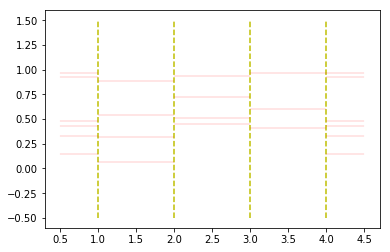

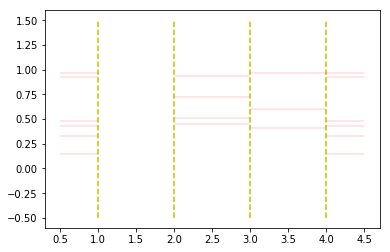

leg
[[1, 0.27789281133920163, [13, 5], [14, 4], [13, 3], [9, 4]], [3, 0.8551913851870157, [15, 5], [-8, 0], [15, 3], [-5, 0]], [2, 0.5861111914248123, [16, 3], [-7, 0], [12, 5], [15, 4]], [], [3, 0.07005559923716609, [6, 3], [9, 2], [7, 3], [5, 2]], [3, 0.5212588853163576, [9, 3], [12, 4], [4, 3], [12, 2]], [2, 0.033700540883219166, [-3, 0], [13, 2], [7, 5], [4, 4]], [3, 0.032324191750725095, [-4, 0], [6, 2], [-1, 0], [4, 2]], [], [2, 0.401295840268884, [0, 3], [14, 2], [4, 5], [5, 4]], [], [], [3, 0.5745369875805788, [5, 5], [2, 2], [5, 3], [15, 2]], [1, 0.06801879788970977, [-2, 0], [0, 4], [6, 5], [0, 2]], [1, 0.49328138758242046, [0, 5], [16, 4], [9, 5], [16, 2]], [3, 0.6759823121770268, [2, 3], [1, 4], [12, 3], [1, 2]], [1, 0.5450606895523773, [14, 5], [-6, 0], [14, 3], [2, 4]]]
line
[[[-1, 0], [7, 0.032324191750725095], [4, 0.07005559923716609], [5, 0.5212588853163576], [12, 0.5745369875805788], [15, 0.6759823121770268], [1, 0.8551913851870157], [-5, 1]], [[-2, 0], [13, 0.0680187

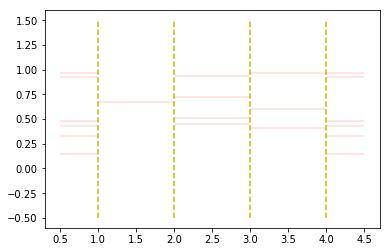

leg
[[1, 0.27789281133920163, [13, 5], [11, 2], [13, 3], [9, 4]], [3, 0.8551913851870157, [15, 5], [-8, 0], [15, 3], [-5, 0]], [2, 0.5861111914248123, [16, 3], [-7, 0], [12, 5], [15, 4]], [], [3, 0.07005559923716609, [6, 3], [9, 2], [7, 3], [11, 4]], [3, 0.5212588853163576, [9, 3], [12, 4], [11, 5], [12, 2]], [2, 0.033700540883219166, [-3, 0], [13, 2], [7, 5], [4, 4]], [3, 0.032324191750725095, [-4, 0], [6, 2], [-1, 0], [4, 2]], [], [2, 0.401295840268884, [0, 3], [14, 2], [4, 5], [5, 4]], [], [0, 0.32851409228523865, [4, 3], [5, 2], [0, 5], [14, 4]], [3, 0.5745369875805788, [5, 5], [2, 2], [5, 3], [15, 2]], [1, 0.06801879788970977, [-2, 0], [0, 4], [6, 5], [0, 2]], [1, 0.49328138758242046, [11, 3], [16, 4], [9, 5], [16, 2]], [3, 0.6759823121770268, [2, 3], [1, 4], [12, 3], [1, 2]], [1, 0.5450606895523773, [14, 5], [-6, 0], [14, 3], [2, 4]]]
line
[[[-1, 0], [7, 0.032324191750725095], [4, 0.07005559923716609], [11, 0.32851409228523865], [5, 0.5212588853163576], [12, 0.5745369875805788], 

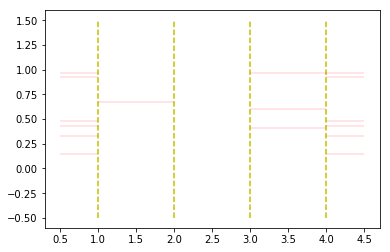

leg
[[], [3, 0.8551913851870157, [15, 5], [-8, 0], [15, 3], [-5, 0]], [2, 0.5861111914248123, [9, 5], [-7, 0], [12, 5], [15, 4]], [], [3, 0.07005559923716609, [6, 3], [9, 2], [7, 3], [11, 4]], [3, 0.5212588853163576, [9, 3], [12, 4], [11, 5], [12, 2]], [2, 0.033700540883219166, [-3, 0], [9, 4], [7, 5], [4, 4]], [3, 0.032324191750725095, [-4, 0], [6, 2], [-1, 0], [4, 2]], [], [2, 0.401295840268884, [6, 5], [2, 4], [4, 5], [5, 4]], [], [0, 0.32851409228523865, [4, 3], [5, 2], [-2, 0], [-6, 0]], [3, 0.5745369875805788, [5, 5], [2, 2], [5, 3], [15, 2]], [], [], [3, 0.6759823121770268, [2, 3], [1, 4], [12, 3], [1, 2]], []]
line
[[[-1, 0], [7, 0.032324191750725095], [4, 0.07005559923716609], [11, 0.32851409228523865], [5, 0.5212588853163576], [12, 0.5745369875805788], [15, 0.6759823121770268], [1, 0.8551913851870157], [-5, 1]], [[-2, 0], [11, 0.32851409228523865], [-6, 1]], [[-3, 0], [6, 0.033700540883219166], [9, 0.401295840268884], [2, 0.5861111914248123], [-7, 1]], [[-4, 0], [7, 0.0323241

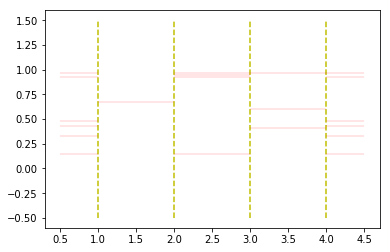

leg
[[1, 0.058372649313664704, [14, 5], [16, 4], [6, 5], [16, 2]], [3, 0.8551913851870157, [15, 5], [-8, 0], [15, 3], [-5, 0]], [2, 0.5861111914248123, [9, 5], [13, 2], [12, 5], [15, 4]], [], [3, 0.07005559923716609, [6, 3], [9, 2], [7, 3], [11, 4]], [3, 0.5212588853163576, [9, 3], [12, 4], [11, 5], [12, 2]], [2, 0.033700540883219166, [14, 3], [0, 2], [7, 5], [4, 4]], [3, 0.032324191750725095, [-4, 0], [6, 2], [-1, 0], [4, 2]], [], [2, 0.401295840268884, [16, 3], [2, 4], [4, 5], [5, 4]], [], [0, 0.32851409228523865, [4, 3], [5, 2], [16, 5], [13, 4]], [3, 0.5745369875805788, [5, 5], [2, 2], [5, 3], [15, 2]], [1, 0.8484473676588659, [11, 3], [-6, 0], [2, 5], [-7, 0]], [1, 0.031375269558555186, [-2, 0], [0, 4], [-3, 0], [6, 4]], [3, 0.6759823121770268, [2, 3], [1, 4], [12, 3], [1, 2]], [1, 0.07312279306671121, [0, 5], [11, 2], [0, 3], [9, 4]]]
line
[[[-1, 0], [7, 0.032324191750725095], [4, 0.07005559923716609], [11, 0.32851409228523865], [5, 0.5212588853163576], [12, 0.5745369875805788], 

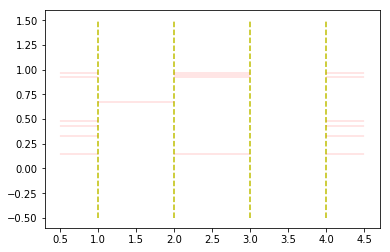

leg
[[1, 0.058372649313664704, [14, 5], [16, 4], [14, 3], [16, 2]], [3, 0.8551913851870157, [15, 5], [-8, 0], [15, 3], [-5, 0]], [], [], [3, 0.07005559923716609, [7, 5], [5, 4], [7, 3], [11, 4]], [3, 0.5212588853163576, [4, 5], [12, 4], [11, 5], [12, 2]], [], [3, 0.032324191750725095, [-4, 0], [4, 4], [-1, 0], [4, 2]], [], [], [], [0, 0.32851409228523865, [4, 3], [5, 2], [16, 5], [13, 4]], [3, 0.5745369875805788, [5, 5], [15, 4], [5, 3], [15, 2]], [1, 0.8484473676588659, [11, 3], [-6, 0], [16, 3], [-7, 0]], [1, 0.031375269558555186, [-2, 0], [0, 4], [-3, 0], [0, 2]], [3, 0.6759823121770268, [12, 5], [1, 4], [12, 3], [1, 2]], [1, 0.07312279306671121, [0, 5], [11, 2], [0, 3], [13, 2]]]
line
[[[-1, 0], [7, 0.032324191750725095], [4, 0.07005559923716609], [11, 0.32851409228523865], [5, 0.5212588853163576], [12, 0.5745369875805788], [15, 0.6759823121770268], [1, 0.8551913851870157], [-5, 1]], [[-2, 0], [14, 0.031375269558555186], [0, 0.058372649313664704], [16, 0.07312279306671121], [11, 0.

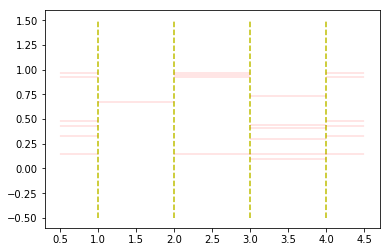

leg
[[1, 0.058372649313664704, [14, 5], [16, 4], [14, 3], [16, 2]], [3, 0.8551913851870157, [10, 3], [9, 2], [15, 3], [-5, 0]], [2, 0.2706092089039175, [16, 3], [8, 4], [4, 5], [5, 4]], [2, 0.7048355191624454, [6, 5], [13, 2], [15, 5], [10, 2]], [3, 0.07005559923716609, [7, 5], [2, 2], [7, 3], [11, 4]], [3, 0.5212588853163576, [2, 3], [8, 2], [11, 5], [12, 2]], [2, 0.5879039232360148, [8, 5], [3, 4], [12, 5], [15, 4]], [3, 0.032324191750725095, [-4, 0], [4, 4], [-1, 0], [4, 2]], [2, 0.558129378239088, [2, 5], [6, 4], [5, 5], [12, 4]], [2, 0.9012642559712472, [10, 5], [-7, 0], [1, 5], [-8, 0]], [2, 0.852218913266714, [13, 3], [9, 4], [3, 3], [1, 4]], [0, 0.32851409228523865, [4, 3], [5, 2], [16, 5], [13, 4]], [3, 0.5745369875805788, [8, 3], [6, 2], [5, 3], [15, 2]], [1, 0.8484473676588659, [11, 3], [-6, 0], [3, 5], [10, 4]], [1, 0.031375269558555186, [-2, 0], [0, 4], [-3, 0], [0, 2]], [3, 0.6759823121770268, [6, 3], [3, 2], [12, 3], [1, 2]], [1, 0.07312279306671121, [0, 5], [11, 2], [0,

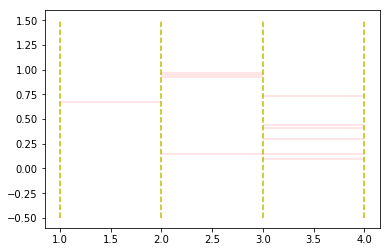

leg
[[1, 0.058372649313664704, [14, 5], [16, 4], [14, 3], [16, 2]], [], [2, 0.2706092089039175, [16, 3], [8, 4], [-4, 0], [8, 2]], [2, 0.7048355191624454, [6, 5], [13, 2], [6, 3], [10, 2]], [], [], [2, 0.5879039232360148, [8, 5], [3, 4], [8, 3], [3, 2]], [], [2, 0.558129378239088, [2, 5], [6, 4], [2, 3], [6, 2]], [2, 0.9012642559712472, [10, 5], [-7, 0], [10, 3], [-8, 0]], [2, 0.852218913266714, [13, 3], [9, 4], [3, 3], [9, 2]], [0, 0.32851409228523865, [-1, 0], [-5, 0], [16, 5], [13, 4]], [], [1, 0.8484473676588659, [11, 3], [-6, 0], [3, 5], [10, 4]], [1, 0.031375269558555186, [-2, 0], [0, 4], [-3, 0], [0, 2]], [], [1, 0.07312279306671121, [0, 5], [11, 2], [0, 3], [2, 4]]]
line
[[[-1, 0], [11, 0.32851409228523865], [-5, 1]], [[-2, 0], [14, 0.031375269558555186], [0, 0.058372649313664704], [16, 0.07312279306671121], [11, 0.32851409228523865], [13, 0.8484473676588659], [-6, 1]], [[-3, 0], [14, 0.031375269558555186], [0, 0.058372649313664704], [16, 0.07312279306671121], [2, 0.27060920890

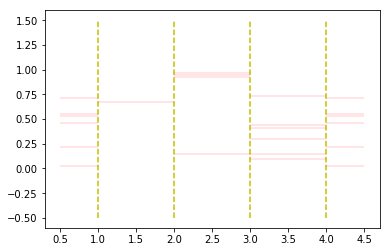

leg
[[1, 0.058372649313664704, [14, 5], [16, 4], [14, 3], [16, 2]], [3, 0.28897125201736296, [2, 3], [15, 4], [-1, 0], [11, 4]], [2, 0.2706092089039175, [16, 3], [8, 4], [-4, 0], [1, 4]], [2, 0.7048355191624454, [6, 5], [13, 2], [6, 3], [4, 4]], [3, 0.7820240109227388, [3, 3], [10, 2], [7, 3], [5, 2]], [3, 0.9717661891781549, [9, 3], [-8, 0], [4, 3], [-5, 0]], [2, 0.5879039232360148, [8, 5], [3, 4], [8, 3], [3, 2]], [3, 0.5355257300611845, [12, 5], [8, 2], [12, 3], [4, 2]], [2, 0.558129378239088, [2, 5], [6, 4], [7, 5], [6, 2]], [2, 0.9012642559712472, [10, 5], [-7, 0], [10, 3], [5, 4]], [2, 0.852218913266714, [13, 3], [9, 4], [4, 5], [9, 2]], [0, 0.32851409228523865, [1, 3], [15, 2], [16, 5], [13, 4]], [3, 0.4645237083964656, [15, 5], [7, 4], [15, 3], [7, 2]], [1, 0.8484473676588659, [11, 3], [-6, 0], [3, 5], [10, 4]], [1, 0.031375269558555186, [-2, 0], [0, 4], [-3, 0], [0, 2]], [3, 0.45312618049377795, [1, 5], [12, 4], [11, 5], [12, 2]], [1, 0.07312279306671121, [0, 5], [11, 2], [0, 

In [8]:
t = TL(4)
# t.fn_virsualization_leg2()
#t.fn_insert_leg(1,0.5)
#t.fn_insert_leg(2,0.6)
#t.fn_insert_leg(2,0.7)
#t.fn_insert_leg(3,0.1)
#t.fn_insert_leg(2,0.65)

#t.fn_delete_leg(0)
#t.fn_insert_leg(2,0.6)
#t.fn_insert_leg(2,0.7)
#t.fn_insert_leg(3,0.1)
#t.fn_insert_leg(2,0.65)
t.fn_generate_poisson_map(4)
t.fn_virsualization_leg2()

for pipe in range(len(t.pipe)):
    tv = t.pipe[pipe][:]
    for ind in tv:
        t.fn_delete_leg(ind)
    t.fn_virsualization_leg2()
    print('leg')
    print(t.leg)
    print('line')
    print(t.line)
    print('pipe')
    print(t.pipe)
    num_leg = np.random.poisson(4)
    v_rand = [np.random.rand() for _ in range(num_leg)]
    if num_leg!=0:
        for y in v_rand:
            t.fn_insert_leg(pipe,y)
        t.fn_virsualization_leg2()
    print('leg')
    print(t.leg)
    print('line')
    print(t.line)
    print('pipe')
    print(t.pipe)

# for x in range(len(t.leg)):
#    print(x)
#    print('leg')
#    print(t.leg)
#    print('line')
#    print(t.line)
#    print('pipe')
#    print(t.pipe)
#    t.fn_delete_leg(x)
#t.fn_virsualization_leg2()


In [192]:
import time
num = 4000

time1 = time.time()

t = TL(num)

t.fn_generate_poisson_map(1)
# t.fn_virsualization_leg2()

for pipe in range(len(t.pipe)):
    tv = t.pipe[pipe][:]
    for ind in tv:
        t.fn_delete_leg(ind)
    # t.fn_virsualization_leg2()
    num_leg = np.random.poisson(4)
    v_rand = [np.random.rand() for _ in range(num_leg)]
    if num_leg!=0:
        for y in v_rand:
            t.fn_insert_leg(pipe,y)
        # t.fn_virsualization_leg2()

time2 = time.time()
print(time2-time1)

0.3941152095794678


In [193]:
import time

Num = 4000

t = TL(Num)
t.fn_generate_poisson(1)
t.fn_pipe_dis_to_dis1()
t.fn_dis1_to_dis2()
t.fn_dis2_to_map()

time1 = time.time()
for k in range(Num):
    t.fn_update_pipe(k,1)
    t.fn_pipe_dis_to_dis1()
    t.fn_dis1_to_dis2()
    t.fn_dis2_to_map()
time2 = time.time()

print(time2-time1)
    


48.48225784301758


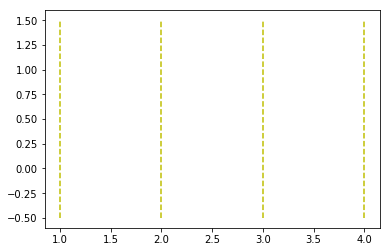

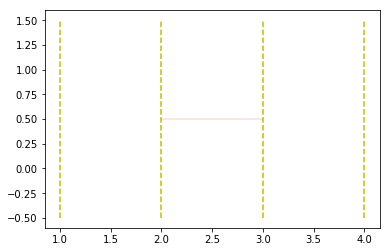

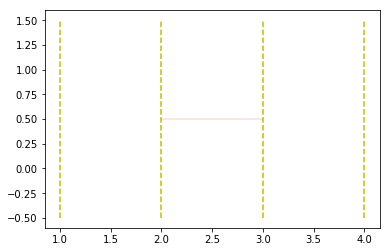

In [197]:
t = TL(4)
t.fn_virsualization_leg2()
t.fn_insert_leg(1,0.5)
t.fn_virsualization_leg2()
t.fn_insert_leg(2,0.5)
t.fn_virsualization_leg2()

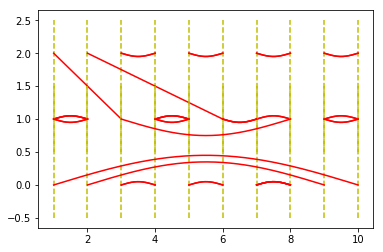

0.0


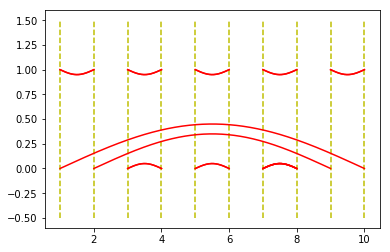

8
21
32


In [237]:
import time

Num = 10

t1 = TL(Num)
t1.fn_generate_poisson(3)
t1.fn_pipe_dis_to_dis1()
t1.fn_dis1_to_dis2()
t1.fn_dis2_to_map()
fn_virsual(t1.map,2)
t2 = TL(Num)
t2.fn_generate_poisson(5)
t2.fn_pipe_dis_to_dis1()
t2.fn_dis1_to_dis2()
t2.fn_dis2_to_map()
fn_virsual(t2.map,1)
plt.show()

time1 = time.time()
t3map = fn_map_product(t1.map,t2.map)
time2 = time.time()
print(time2-time1)

fn_virsual(t3map,1)
plt.show()
print(t1.map[0])
print(t2.map[0])
print(t3map[0])

In [238]:
print(t3map)
fn_map_contract(t3map)

[32, 2, 1, 4, 3, 6, 5, 8, 7, 10, 9, 20, 19, 14, 13, 16, 15, 18, 17, 12, 11]
1
2
12
19
9
10
20
11
1
3
4
14
13
3
5
6
16
15
5
7
8
18
17
7


36

In [108]:
tv1

[1, 5, 3]

In [109]:
tv2

[4, 5, 6]

In [110]:
tv2[1] = 8
tv1

[1, 5, 3]

In [111]:
tv2

[4, 8, 6]

In [195]:
not None

True